The features are : [0 1 2 3 4 5 6 7 8 9]
原有的特征数量为： 64
(1797, 2)


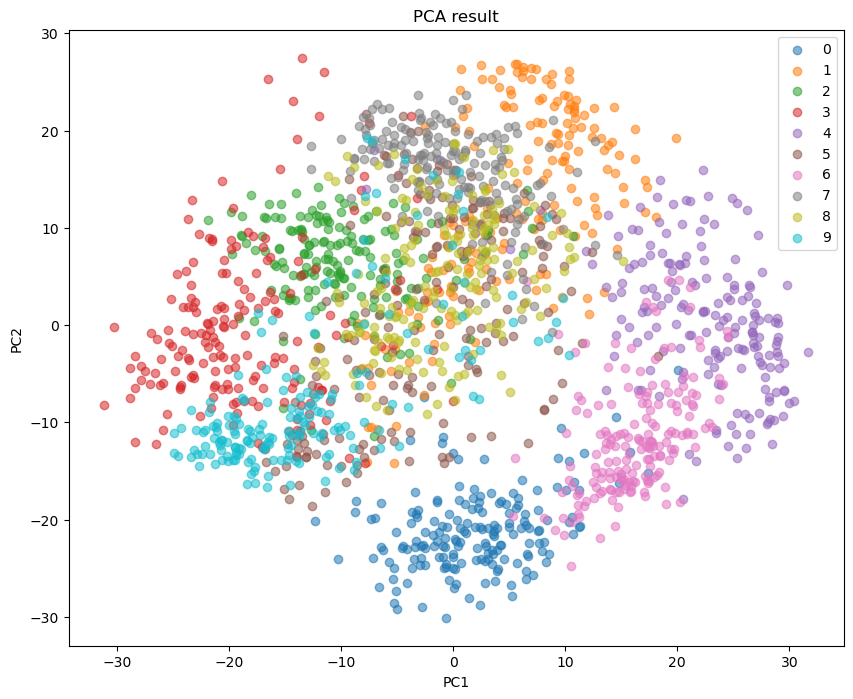

In [12]:
#使用PCA完成对于手写数字的数据集load_digits的二维可视化
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt    
import numpy as np  


#加载数据集
data=load_digits()
target=np.unique(data.target)
print("The features are :",target)
data_digits=data.data
hang,lie=data_digits.shape
print("原有的特征数量为：",lie)
#使用pca进行降维处理
pca=PCA(n_components=2)
pca_data=pca.fit(data_digits)
new_data=pca_data.transform(data_digits)
print(new_data.shape)
#二维空间中可视化这些数据data
plt.figure(figsize=(10,8))
for i in target:
    plt.scatter(new_data[data.target==i,0],new_data[data.target==i,1],label=i,alpha=0.55)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA result')
plt.legend()
plt.show()

本代码实现了对手写数字数据集（load_digits）的PCA降维及二维可视化。主要流程如下：

1. 加载数据集：使用`load_digits()`获取手写数字数据及标签，数据集包含1797个样本，每个样本有64个特征（8x8像素灰度图）。
2. 数据探索：输出所有类别（数字0-9）及原始特征数量（64维），便于了解数据结构。
3. PCA降维：通过`PCA(n_components=2)`将64维特征降至2维，便于后续可视化分析。降维后数据保存在`new_data`中，形状为(1797, 2)。
4. 可视化：对每个数字类别分别绘制散点图，展示降维后的分布。每类数字用不同颜色区分，并添加图例、坐标轴标签和标题，提升可读性。

**可能出错的细节：**
- `pca.fit(data_digits)`返回的是PCA对象本身，通常无需赋值给`pca_data`，直接用`pca.transform(data_digits)`即可，避免混淆。
- `plt.scatter`中的`new_data[data.target==i,0]`，需确保`data.target`与`new_data`行数一致，否则会报索引错误。这里两者均为1797行，匹配无误。
- 若数据集较大，散点图可能重叠严重，建议调整点的透明度（`alpha`参数），如`plt.scatter(..., alpha=0.6)`。
- 若未正确导入`matplotlib.pyplot`或`numpy`，会导致运行错误。需确保相关库已导入。
- 若`n_components`设置大于原始特征数（如大于64），会报错，应确保降维目标小于等于原始特征数。
- 若数据包含缺失值（NaN），PCA无法直接处理，需先进行缺失值填补或删除。
- 可进一步优化：为不同类别选择更明显的颜色，或使用`cmap`参数自动分配颜色；可添加`edgecolor`提升点的可视化效果。
- 若想保存图像，可使用`plt.savefig('pca_digits.png')`。

整体代码结构清晰，适合PCA降维与可视化的入门学习，也便于后续扩展如聚类、分类等任务。